Import Libraries

In [46]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.activations import linear, relu
import matplotlib.pyplot as plt

Importing Dataset

In [47]:
train_x = np.load("data/X.npy")
train_y = np.load("data/y.npy")

Visualising Dataset (Selecting 64 Random Images And Their Corresponding Label)

In [ ]:
def display_digit(X):
    fig, ax = plt.subplots(1,1, figsize=(0.5,0.5))
    widgvis(fig)
    X_reshaped = X.reshape((20,20)).T
    ax.imshow(X_reshaped, cmap='gray')
    plt.show()

def widgvis(fig):
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

m, n = train_x.shape
selected_indices = []

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])
widgvis(fig)

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    selected_indices.append(random_index)
    X_random_reshaped = train_x[random_index].reshape((20,20)).T
    ax.imshow(X_random_reshaped, cmap='gray')
    ax.set_title(train_y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

Constructing Our Model

In [ ]:
tf.random.set_seed(1234)
model = Sequential(
    [
        InputLayer(shape=(400,)),
        Dense(25, activation='relu', name='L1'),
        Dense(15, activation='relu', name='L2'),
        Dense(10, activation='linear', name='L3'),
    ]
)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001)
)

model.summary()

Training Our Model (The More Iteration It Does, The More Accurate It Becomes)

In [ ]:
history = model.fit(
    train_x, train_y,
    epochs=50
)

Visualising Our Loss Function Value

In [ ]:
fig,ax = plt.subplots(1,1, figsize = (4,3))
ax.plot(history.history['loss'], label='loss')
ax.set_ylim([0, 2])
ax.set_xlabel('Epoch')
ax.set_ylabel('loss (cost)')
ax.legend()
ax.grid(True)
plt.show()

Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
 Predicted Digit: 6
 Correct Digit: 6
 Digit Image:


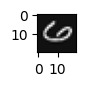

In [86]:
index = np.random.randint(m)
test_input = train_x[index]
test_output = train_y[index]
prediction = model.predict(test_input.reshape(1,400))
print(f" Predicted Digit: {np.argmax(prediction)}")
print(f" Correct Digit: {test_output[0]}")
print(f" Digit Image:")
display_digit(train_x[index])